#<center> **Clustering**

> Nama : Vivi Fitriyani

> NIM : 1306620050

> Mata Kuliah : Machine Learning

#1. K-Means. Misalkan Anda memiliki dataset dari delapan pelanggan toko online dengan atribut x1 dan x2, yang menyatakan jumlah pembelian untuk masing - masing barang:

a (3, 5)

b (7, 3)

c (1, 8)

d (5, 4)

e (4, 6)

f (2, 10)

g (6, 5)

h (9, 2)

Kelompokkan data tersebut dalam dua kelompok dengan metode k-Means. 
Gunakan titik c(1, 8) dan f(2, 10) sebagai pusat kedua cluster tersebut. 


###a. Tentukan anggota cluster sesuai metode k-Means

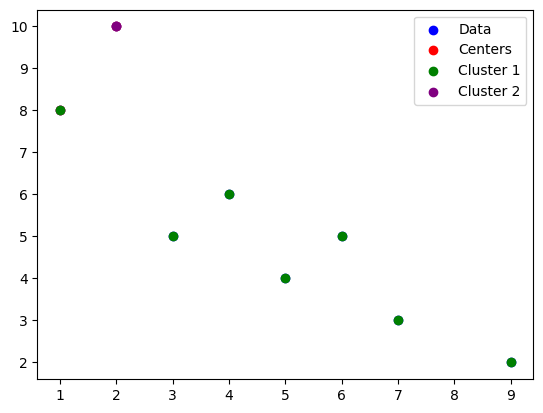

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definisikan data
data = np.array([[3, 5], [7, 3], [1, 8], [5, 4], [4, 6], [2, 10], [6, 5], [9, 2]])

# Definisikan pusat cluster
centers = np.array([[1, 8], [2, 10]])

# Inisialisasi anggota cluster
cluster1 = []
cluster2 = []

# Hitung jarak Euclidean dan kelompokkan data ke cluster terdekat
for point in data:
    dist_to_center1 = np.linalg.norm(point - centers[0])
    dist_to_center2 = np.linalg.norm(point - centers[1])
    
    if dist_to_center1 < dist_to_center2:
        cluster1.append(point)
    else:
        cluster2.append(point)

# Konversi ke array numpy
cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)

# Plotting data dan pusat cluster
plt.scatter(data[:, 0], data[:, 1], color='blue', label='Data')
plt.scatter(centers[:, 0], centers[:, 1], color='red', label='Centers')

# Plotting anggota cluster
plt.scatter(cluster1[:, 0], cluster1[:, 1], color='green', label='Cluster 1')
plt.scatter(cluster2[:, 0], cluster2[:, 1], color='purple', label='Cluster 2')

# Tampilkan legenda
plt.legend()

# Tampilkan plot
plt.show()


###b.  Lakukan update kedua pusat cluster dengan algoritma k-Means. Tuliskan pusat cluster yang baru.


Pusat Cluster Baru:
[5.         4.71428571]
[ 2. 10.]


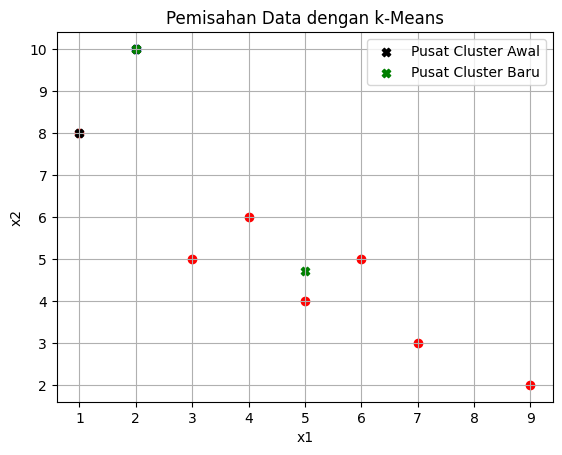

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definisikan data
data = np.array([[3, 5], [7, 3], [1, 8], [5, 4], [4, 6], [2, 10], [6, 5], [9, 2]])

# Inisialisasi pusat cluster
centers = np.array([[1, 8], [2, 10]], dtype=float)

# Inisialisasi variabel untuk menyimpan pusat cluster baru
new_centers = np.zeros_like(centers)

# Inisialisasi variabel untuk menyimpan jumlah anggota dalam setiap cluster
count_cluster1 = 0
count_cluster2 = 0

# Hitung rata-rata dari setiap anggota cluster
for point in data:
    dist_to_center1 = np.linalg.norm(point - centers[0])
    dist_to_center2 = np.linalg.norm(point - centers[1])
    
    if dist_to_center1 < dist_to_center2:
        new_centers[0] += point
        count_cluster1 += 1
        plt.scatter(point[0], point[1], c='red')
    else:
        new_centers[1] += point
        count_cluster2 += 1
        plt.scatter(point[0], point[1], c='blue')

# Update pusat cluster dengan rata-rata dari anggota cluster
new_centers[0] /= float(count_cluster1)
new_centers[1] /= float(count_cluster2)

# Cetak pusat cluster baru
print("Pusat Cluster Baru:")
for center in new_centers:
    print(center)

# Plot pusat cluster
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', label='Pusat Cluster Awal')
plt.scatter(new_centers[:, 0], new_centers[:, 1], c='green', marker='X', label='Pusat Cluster Baru')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Pemisahan Data dengan k-Means')
plt.legend()
plt.grid(True)
plt.show()


#Fuzzy C-Means (FCM).

###a. Tentukan anggota cluster sesuai metode fuzzy

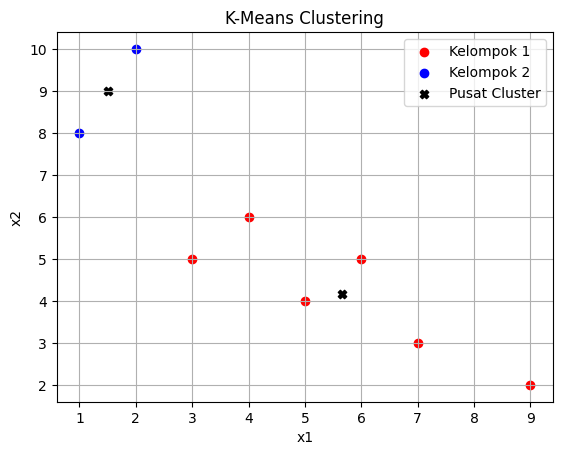

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Inisialisasi data pelanggan
data = np.array([[3, 5],
                 [7, 3],
                 [1, 8],
                 [5, 4],
                 [4, 6],
                 [2, 10],
                 [6, 5],
                 [9, 2]])

# Inisialisasi pusat cluster
centers = np.array([[1, 8],
                    [2, 10]])

# Fungsi untuk menghitung jarak Euklides antara dua titik
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Fungsi untuk mengelompokkan data ke dalam kelompok yang memiliki jarak terdekat dengan pusat cluster
def assign_clusters(data, centers):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, center) for center in centers]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

# Fungsi untuk memperbarui pusat cluster berdasarkan rata-rata dari titik-titik data dalam kelompok yang sama
def update_centers(data, clusters, k):
    new_centers = []
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            new_center = np.mean(cluster_points, axis=0)
            new_centers.append(new_center)
        else:
            new_centers.append(centers[i])  # Jika kelompok kosong, gunakan pusat cluster awal
    return np.array(new_centers)

# Algoritma K-Means
k = centers.shape[0]
max_iterations = 100
iteration = 0

while iteration < max_iterations:
    iteration += 1

    # Langkah 2: Menghitung jarak antara setiap titik data dengan pusat cluster
    clusters = assign_clusters(data, centers)

    # Langkah 4: Memperbarui pusat cluster
    new_centers = update_centers(data, clusters, k)

    # Jika pusat cluster tidak berubah, hentikan iterasi
    if np.all(centers == new_centers):
        break

    centers = new_centers

# Plotting hasil kelompok
colors = ['red', 'blue']
for i in range(k):
    cluster_points = data[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f"Kelompok {i+1}")

# Plotting pusat cluster
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', label='Pusat Cluster')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()


###b.  Lakukan update kedua pusat cluster dengan algoritma k-Means. Tuliskan pusat cluster yang baru.


In [4]:
# Fungsi untuk memperbarui pusat cluster berdasarkan rata-rata dari titik-titik data dalam kelompok yang sama
def update_centers(data, clusters, k):
    new_centers = []
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            new_center = np.mean(cluster_points, axis=0)
            new_centers.append(new_center)
        else:
            new_centers.append(centers[i])  # Jika kelompok kosong, gunakan pusat cluster awal
    return np.array(new_centers)

# Algoritma K-Means
k = centers.shape[0]
max_iterations = 100
iteration = 0

while iteration < max_iterations:
    iteration += 1

    # Langkah 2: Menghitung jarak antara setiap titik data dengan pusat cluster
    clusters = assign_clusters(data, centers)

    # Langkah 4: Memperbarui pusat cluster
    new_centers = update_centers(data, clusters, k)

    # Jika pusat cluster tidak berubah, hentikan iterasi
    if np.all(centers == new_centers):
        break

    centers = new_centers

# Menampilkan pusat cluster yang baru
for i, center in enumerate(centers):
    print(f"Pusat Cluster {i+1}: {center}")


Pusat Cluster 1: [4.625 5.375]
Pusat Cluster 2: [4.625 5.375]


<ipython-input-6-09ca7294e904>:24: RuntimeWarning: divide by zero encountered in true_divide
  membership_degrees[i, j] = 1 / np.sum((distance / distances) ** 2)


Pusat Cluster Baru:
[6.0008471  4.12271747]
[2.97223568 6.87932987]


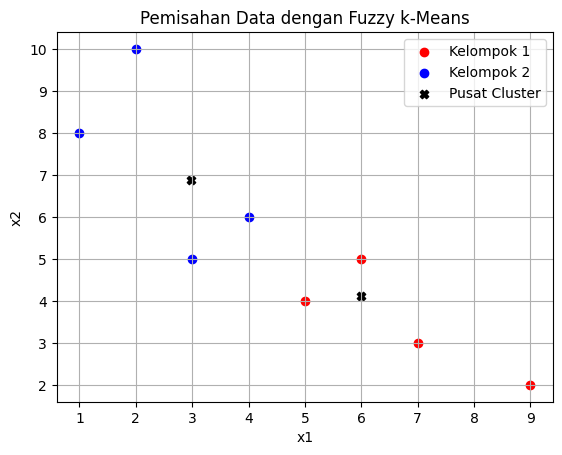

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definisikan data
data = np.array([[3, 5], [7, 3], [1, 8], [5, 4], [4, 6], [2, 10], [6, 5], [9, 2]])

# Inisialisasi pusat cluster
centers = np.array([[1, 8], [2, 10]], dtype=float)

# Inisialisasi variabel untuk menyimpan pusat cluster baru
new_centers = np.zeros_like(centers)

# Inisialisasi variabel untuk menyimpan derajat keanggotaan setiap data terhadap setiap cluster
membership_degrees = np.zeros((data.shape[0], centers.shape[0]), dtype=float)

# Fungsi untuk menghitung derajat keanggotaan menggunakan model fuzzy c-means
def calculate_membership_degrees(data, centers):
    for i, point in enumerate(data):
        distances = np.linalg.norm(point - centers, axis=1)
        for j, distance in enumerate(distances):
            if distance == 0:
                membership_degrees[i, j] = 1
            else:
                membership_degrees[i, j] = 1 / np.sum((distance / distances) ** 2)

# Fungsi untuk menghitung pusat cluster baru menggunakan derajat keanggotaan
def calculate_new_centers(data, membership_degrees):
    for j in range(centers.shape[0]):
        numerator = np.sum(membership_degrees[:, j][:, np.newaxis] * data, axis=0)
        denominator = np.sum(membership_degrees[:, j])
        new_centers[j] = numerator / denominator

# Algoritma fuzzy c-means
max_iterations = 100
iteration = 0

while iteration < max_iterations:
    iteration += 1

    # Hitung derajat keanggotaan
    calculate_membership_degrees(data, centers)

    # Hitung pusat cluster baru
    calculate_new_centers(data, membership_degrees)

    # Jika pusat cluster tidak berubah, hentikan iterasi
    if np.all(centers == new_centers):
        break

    centers = new_centers.copy()

# Cetak pusat cluster baru
print("Pusat Cluster Baru:")
for center in centers:
    print(center)

# Plot hasil pemisahan data dengan kelompok
colors = ['red', 'blue']
for i in range(centers.shape[0]):
    cluster_points = data[np.argmax(membership_degrees, axis=1) == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f"Kelompok {i+1}")

# Plot pusat cluster
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', label='Pusat Cluster')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Pemisahan Data dengan Fuzzy k-Means')
plt.legend()
plt.grid(True)
plt.show()


###c. Jika ternyata empat sampel pertama termasuk kelas A dan sisanya kelas B, lakukan evaluasi ekstrinsik dengan Rank Index kemudian berikan penjelasan.

In [8]:
from itertools import combinations

def rank_index(ground_truth, clustering):
    n = len(ground_truth)
    agree_pairs = 0
    disagree_pairs = 0

    for pair in combinations(range(n), 2):
        i, j = pair
        same_cluster_gt = ground_truth[i] == ground_truth[j]
        same_cluster_clustering = clustering[i] == clustering[j]

        if same_cluster_gt and same_cluster_clustering:
            agree_pairs += 1
        elif not same_cluster_gt and not same_cluster_clustering:
            agree_pairs += 1
        else:
            disagree_pairs += 1

    return agree_pairs / (agree_pairs + disagree_pairs)

# Ground Truth
ground_truth = np.array([1, 1, 1, 1, 2, 2, 2, 2])

# Pengelompokan
clustering = np.array([1, 1, 1, 1, 2, 2, 2, 2])

# Evaluasi menggunakan Rank Index
ri = rank_index(ground_truth, clustering)

print("Rank Index:", ri)


Rank Index: 1.0


Rank index di inisiasi dengan rentan 0 - 1 nilai 1 menandakan kesempurnaan ground truth  dan pada hasil evaluasi didapatkan Rank Index bernilai 1.0 menandakan bahwa semua pasangan sampel memiliki konsistensi dalam pengelompokannya.